<font size="+5">#03. Decision Tree. A Supervised Classification Model</font>

<ul>
    <li>Doubts? → Ask me in <img src="https://emoji.gg/assets/emoji/3970-discord.png" style="height: 1em; vertical-align: middle;"> <a href="https://discord.gg/cmB3KGsqMy">Discord</a></li>
    <li>Tutorials → <img src="https://openmoji.org/php/download_asset.php?type=emoji&emoji_hexcode=E044&emoji_variant=color" style="height: 1em; vertical-align: middle;"> <a href="https://www.youtube.com/channel/UCovCte2I3loteQE_kRsfQcw">YouTube</a></li>
    <li>Book Private Lessons → <span style="color: orange">@</span> <a href="https://sotastica.com/reservar">sotastica</a></li>
</ul>

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [70]:
import pandas as pd

url = 'https://raw.githubusercontent.com/py-thocrates/data/main/internet_usage_spain.csv'

df = pd.read_csv(url)
df.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


# Data Preprocessing

> - Categorical variables contains `text`
> - If you pass the data to the model
> - It won't know how to interpret the text
> - Therefore, you need a way to convert text values
> - To numbers such as `0` or `1` **Dummy Variables**
> - Which `function()` do you use to achieve this?

In [72]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0


# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [178]:
explanatory=df.drop(columns='internet_usage')
target = df.internet_usage

explanatory

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,0,0,0,0,0,0
1,72,1,0,0,0,0,0
2,48,1,0,0,0,0,1
3,59,1,0,0,0,1,0
4,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2450,43,1,0,0,0,0,0
2451,18,0,1,0,0,0,0
2452,54,0,0,0,0,0,0
2453,31,1,1,0,0,0,0


In [179]:
target

0       0
1       1
2       1
3       0
4       1
       ..
2450    1
2451    1
2452    0
2453    1
2454    0
Name: internet_usage, Length: 2455, dtype: int64

## Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variables**
> 2. `y`: **target varaible**

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
model=DecisionTreeClassifier()

In [139]:
model.fit(X=explanatory,y=target)

DecisionTreeClassifier()

In [140]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 7,
 'n_features_': 7,
 'n_outputs_': 1,
 'classes_': array([0, 1], dtype=int64),
 'n_classes_': 2,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x226fd5497a0>}

## Make a Prediction

> You should already know that ML models are
> mathematical equations that you optimize to
> calculate predictions
>
> As you `fit()` the model, the mathematical function
> is built. Therefore, could you make a prediction?
>
> - Select a random person:

> - Compute the probability of this person for `internet_usage`:

In [142]:
person = df.sample()
person

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
39,0,54,0,0,0,0,0,0


In [143]:
person_exp=person.drop(columns='internet_usage')


In [144]:
model.predict_proba(X=person_exp)

array([[0.73333333, 0.26666667]])

## Visualize the Model

> 1. Use `plot_tree()`, contained in `tree` module from `sklearn` library
> 2. Then, you may use `[shift] + [tab]` to see what **parameters** the function is asking for

In [132]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

KeyError: 0

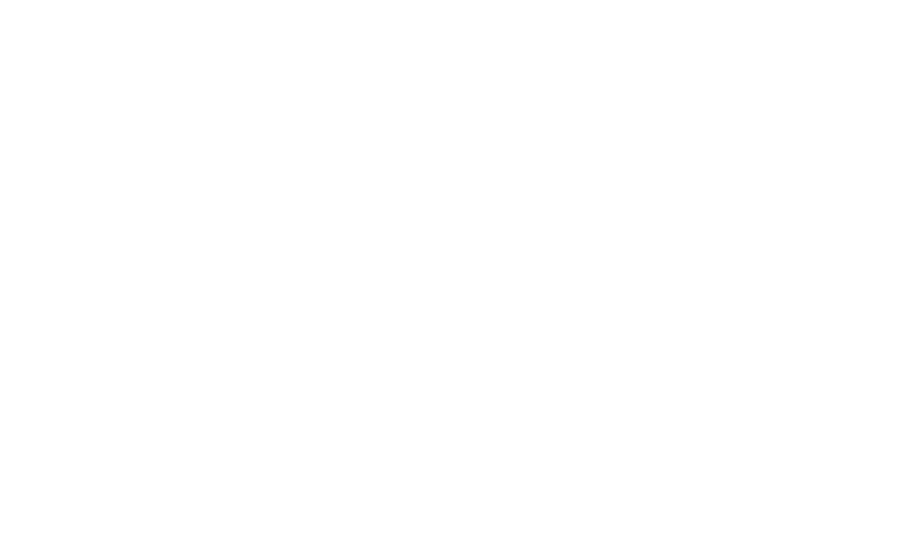

In [146]:
plt.figure(figsize=(16,10))
plot_tree(decision_tree=model,feature_names=explanatory,filled=True,fontsize=10);

> - Could you justify how we got to the prediction in previous exercise?

### Select a random person:



In [164]:
person


,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
39,0,54,0,0,0,0,0,0


### Compute the probability of this person for internet_usage:

In [165]:
model.predict_proba(X=person_exp)

array([[0.73333333, 0.26666667]])

# Decision Tree Algorithm Explanation

> _You may watch the following video to understand how the Decision Tree works:_

In [6]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Model Interpretation

> - Which is the variable in the **root node**?
> - Is it the most **important feature**? Why?

# Real vs. Predicted Data

> - Compute all predictions:
>
> - `model.predict()`

In [161]:
model.predict(X=explanatory)
y_pred=model.predict(X=explanatory)
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predictions`

In [180]:
dfsel=df[['internet_usage']].copy()
dfsel
dfsel['pred_dt']=y_pred


> - `df.sample(10)` to check if predictions are equal to reality:

In [181]:
dfsel.sample(10)

,internet_usage,pred_dt
1358,1,1
2305,0,0
2014,0,0
819,0,0
856,0,0
1019,1,1
451,0,0
2360,0,0
805,1,1
1000,0,0


> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [182]:
model.score(X=explanatory,y=target)

0.859877800407332

# Confusion Matrix

> 1. Use function `confusion_matrix()`, or `plot_confusion_matrix()`
> 2. What represents the first number in the matrix?

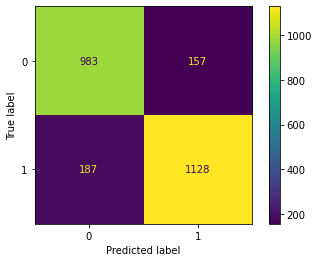

In [187]:
from sklearn.metrics import plot_confusion_matrix
y_true=df.internet_usage
y_pred=dfsel['pred_dt']
plot_confusion_matrix(estimator=model,X=explanatory,y_true=target)


# Other Metrics

## Sensitivity

In [191]:
covid_real=187 + 1128
covid_predicho_reales=1128
covid_predicho_reales/covid_real 

0.8577946768060837

## Specificity

In [192]:
no_covid_real= 983 + 157
no_covid_predicho_no_covid= 983
no_covid_predicho_no_covid/no_covid_real

0.862280701754386

## Classification Report

> 1. Use `classification_report()`
> 2. Save the resulting object in `report`
> 3. `print(report)`
> 4. Are some numbers equal to the ones we calculated before (Sensitivity & Specificity?

In [196]:
from sklearn.metrics import classification_report
classification_report(y_true=target,y_pred=dfsel.pred_dt)
report=classification_report(y_true=target,y_pred=dfsel.pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1140
           1       0.88      0.86      0.87      1315

    accuracy                           0.86      2455
   macro avg       0.86      0.86      0.86      2455
weighted avg       0.86      0.86      0.86      2455



## ROC Curve

> - Use `plot_roc_curve()`
>
> _You may watch the following video to understand the metric:_

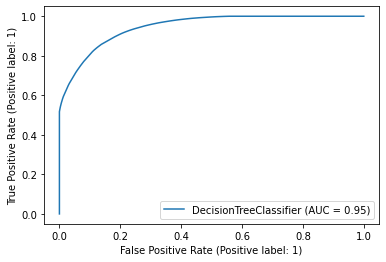

In [198]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(estimator=model,X=explanatory,y=target)

In [7]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Achieved Goals

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [ ] Entender cómo se usan los **Algoritmos de Árboles**.
- [ ] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [ ] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [ ] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [ ] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [ ] Entender la necesidad de **normalizar** los datos.